In [23]:
# Import
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [24]:
# Import data
data = pd.read_csv('all_stocks_5yr.csv')

FileNotFoundError: [Errno 2] File b'all_stocks_5yr.csv' does not exist: b'all_stocks_5yr.csv'

In [ ]:
# Drop date variable
data = data.dropna()
data = data.drop(['date','open','high','low','volume','Adj Close'],1)
data = pd.pivot_table(data, index=['Name'], columns=data.groupby(['Name']).cumcount().add(1), values=['close'])
data = data.dropna()
data = data.T

In [3]:
# Dimensions of dataset
n = data.shape[0]
p = data.shape[1]


NameError: name 'data' is not defined

In [4]:
# Make data a np.array
data = data.values

NameError: name 'data' is not defined

In [5]:
# Training and test data
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end + 1
test_end = n
data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]


NameError: name 'n' is not defined

In [6]:
# Scale data
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

NameError: name 'data_train' is not defined

In [7]:
# Build X and y
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]


NameError: name 'data_train' is not defined

In [8]:
# Number of stocks in training data
n_stocks = X_train.shape[1]


NameError: name 'X_train' is not defined

In [9]:
# Neurons
n_neurons_1 = 1024
n_neurons_2 = 512
n_neurons_3 = 256
n_neurons_4 = 128


In [10]:
# Session
net = tf.InteractiveSession()


In [11]:
# Placeholder
X = tf.placeholder(dtype=tf.float32, shape=[None, n_stocks])
Y = tf.placeholder(dtype=tf.float32, shape=[None])

NameError: name 'n_stocks' is not defined

In [12]:
# Initializers
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()


In [13]:
# Hidden weights
W_hidden_1 = tf.Variable(weight_initializer([n_stocks, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))



NameError: name 'n_stocks' is not defined

In [14]:
# Output weights
W_out = tf.Variable(weight_initializer([n_neurons_4, 1]))
bias_out = tf.Variable(bias_initializer([1]))

In [15]:
# Hidden layer
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))

NameError: name 'X' is not defined

In [16]:
# Output layer (transpose!)
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))

NameError: name 'hidden_4' is not defined

In [17]:
# Cost function
mse = tf.reduce_mean(tf.squared_difference(out, Y))

NameError: name 'out' is not defined

In [18]:
# Optimizer
opt = tf.train.AdamOptimizer().minimize(mse)

NameError: name 'mse' is not defined

In [19]:
# Init
net.run(tf.global_variables_initializer())


NameError: name 'y_test' is not defined

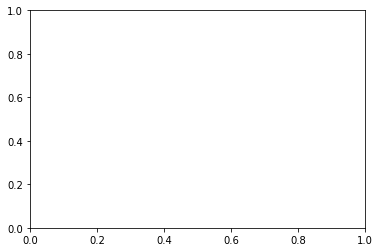

In [20]:
# Setup plot
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test * 0.5)
plt.show()

In [21]:
# Fit neural net
batch_size = 256
mse_train = []
mse_test = []

In [22]:
# Run
epochs = 10
for e in range(epochs):

    # Shuffle training data
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        # Run optimizer with batch
        net.run(opt, feed_dict={X: batch_x, Y: batch_y})

        # Show progress
        if np.mod(i, 50) == 0:
            # MSE train and test
            mse_train.append(net.run(mse, feed_dict={X: X_train, Y: y_train}))
            mse_test.append(net.run(mse, feed_dict={X: X_test, Y: y_test}))
            print('MSE Train: ', mse_train[-1])
            print('MSE Test: ', mse_test[-1])
            # Prediction
            pred = net.run(out, feed_dict={X: X_test})
            line2.set_ydata(pred)
            plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
            plt.pause(0.05)

NameError: name 'y_train' is not defined